In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, roc_auc_score

In [2]:
new_df = pd.read_csv('diabetes_prediction_dataset.csv')

In [3]:
new_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
new_df.shape

(100000, 9)

In [5]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
new_df['gender'] = new_df['gender'].map({'Female': 0, 'Male': 1})
new_df['smoking_history'] = new_df['smoking_history'].map({'never': 0, 'current': 1, 'former': 2, 'not current': 3, 'ever': 4})

In [7]:
new_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0.0,80.0,0,1,0.0,25.19,6.6,140,0
1,0.0,54.0,0,0,NaN,27.32,6.6,80,0
2,1.0,28.0,0,0,0.0,27.32,5.7,158,0
3,0.0,36.0,0,0,1.0,23.45,5.0,155,0
4,1.0,76.0,1,1,1.0,20.14,4.8,155,0


In [8]:
new_df['diabetes'].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

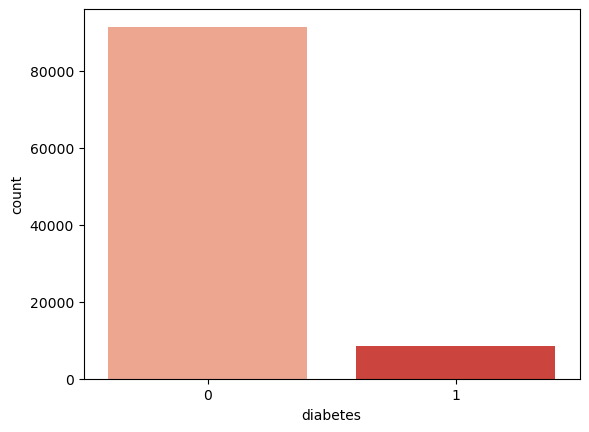

In [9]:
sns.countplot(x="diabetes",data=new_df, palette="Reds")
plt.show()

In [10]:
new_df.dropna(inplace = True)

In [11]:
X = new_df.drop('diabetes', axis=1)  
y = new_df['diabetes']               

In [12]:
new_df.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,64172.000000,64172.000000,64172.000000,64172.000000,64172.000000,64172.000000,64172.000000,64172.000000,64172.000000
mean,0.394565,46.547268,0.097909,0.047045,0.986708,28.424262,5.564279,139.629792,0.109799
std,0.488761,19.539695,0.297194,0.211738,1.286545,6.515975,1.095535,42.166693,0.312641
min,0.000000,0.160000,0.000000,0.000000,0.000000,10.080000,3.500000,80.000000,0.000000
25%,0.000000,31.000000,0.000000,0.000000,0.000000,24.600000,4.800000,100.000000,0.000000
50%,0.000000,47.000000,0.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,2.000000,31.100000,6.200000,159.000000,0.000000
max,1.000000,80.000000,1.000000,1.000000,4.000000,91.820000,9.000000,300.000000,1.000000


In [13]:
new_df.shape

(64172, 9)

In [14]:
from sklearn import preprocessing
pre_process = preprocessing.StandardScaler().fit(X)
x_transform = pre_process.fit_transform(X)

In [15]:
# Use x and y variables to split the training data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_transform, y, test_size = .2, random_state = 101)

# LogisticRegression

In [16]:
from sklearn.linear_model import LogisticRegression

print('Logistic Regression')
log_reg = LogisticRegression(max_iter=100)

log_reg.fit(x_train, y_train)

Logistic Regression


LogisticRegression()

In [17]:
print('Logistic Regression')
print('--'*30)

train_accuracy_log_reg = log_reg.score(x_train,y_train)
print(f'train_accuracy: {train_accuracy_log_reg}')

y_pred_log_reg = log_reg.predict(x_test)

log_reg_accuracy = round(accuracy_score(y_test, y_pred_log_reg) * 100,2)
print('Tasting Accuracy', log_reg_accuracy,'%')

Logistic Regression
------------------------------------------------------------
train_accuracy: 0.949490620799813
Tasting Accuracy 94.76 %


In [18]:
print("\nClassification Report (Testing Data):")
print(classification_report(y_test, y_pred_log_reg))


Classification Report (Testing Data):
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     11425
           1       0.86      0.62      0.72      1410

    accuracy                           0.95     12835
   macro avg       0.91      0.81      0.85     12835
weighted avg       0.94      0.95      0.94     12835



In [19]:
conf_matrix = confusion_matrix(y_test, y_pred_log_reg)
print("\nConfusion Matrix (Testing Data):")
print(conf_matrix)


Confusion Matrix (Testing Data):
[[11283   142]
 [  531   879]]


In [20]:
TN, FP, FN, TP = conf_matrix.ravel()

# Display TP, FP, TN, FN
print("\nTrue Positives:", TP)
print("False Positives:", FP)
print("True Negatives:", TN)
print("False Negatives:", FN)



True Positives: 879
False Positives: 142
True Negatives: 11283
False Negatives: 531


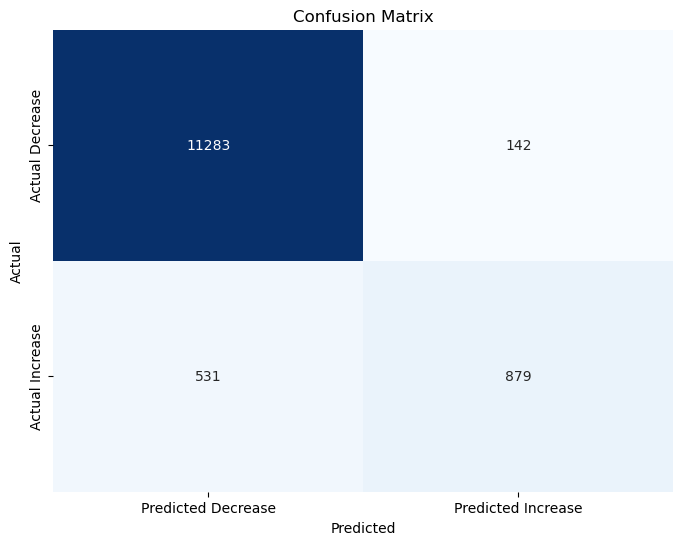

In [21]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted Decrease', 'Predicted Increase'], 
            yticklabels=['Actual Decrease', 'Actual Increase'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

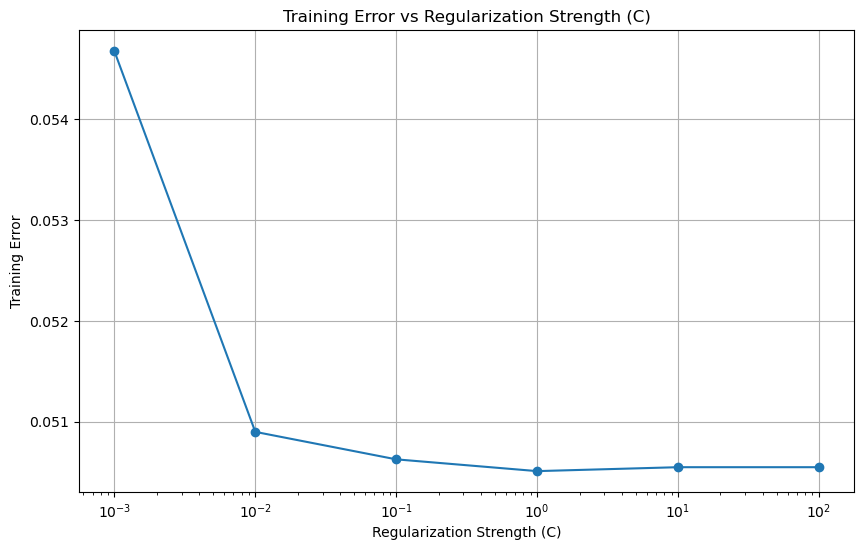

In [22]:
training_errors = []
C_values = [0.001, 0.01, 0.1, 1, 10, 100]  # Range of regularization strengths

for C in C_values:
    log_reg = LogisticRegression(C=C, random_state=42)
    log_reg.fit(x_train, y_train)
    training_errors.append(1 - log_reg.score(x_train, y_train))

plt.figure(figsize=(10, 6))
plt.plot(C_values, training_errors, marker='o', linestyle='-')
plt.title('Training Error vs Regularization Strength (C)')
plt.xlabel('Regularization Strength (C)')
plt.ylabel('Training Error')
plt.xscale('log')  # Use a logarithmic scale for better visualization
plt.grid(True)
plt.show()

In [23]:
roc_auc = roc_auc_score(y_test, y_pred_log_reg)
print(roc_auc)

0.8054876856464454


# DecisionTree

In [24]:
from sklearn.tree import DecisionTreeClassifier 

print('Decision Tree Classifier')

Dtree = DecisionTreeClassifier()

Dtree.fit(x_train, y_train)

Decision Tree Classifier


DecisionTreeClassifier()

In [25]:
y_pred_train = Dtree.predict(x_train)
y_pred_test_DT = Dtree.predict(x_test)

In [26]:
train_accuracy = round(accuracy_score(y_train, y_pred_train) * 100, 2)  # Calculate the training accuracy by comparing predicted values with actual values and rounding to 2 decimal places
test_accuracy = round(accuracy_score(y_test, y_pred_test_DT) * 100, 2)  # Calculate the testing accuracy by comparing predicted values with actual values and rounding to 2 decimal places

In [27]:
print('=======================================')
print('      Decision Tree Classifier        ')
print('=======================================')
print(f'Training Accuracy: {train_accuracy:.2f}%')  # Print the training accuracy
print(f'Testing Accuracy: {test_accuracy:.2f}%')  # Print the testing accuracy
print('=======================================')

      Decision Tree Classifier        
Training Accuracy: 99.94%
Testing Accuracy: 93.86%


In [28]:
# Display classification report for testing data
print("\nClassification Report (Testing Data):")
print(classification_report(y_test, y_pred_test_DT))


Classification Report (Testing Data):
              precision    recall  f1-score   support

           0       0.97      0.96      0.97     11425
           1       0.71      0.75      0.73      1410

    accuracy                           0.94     12835
   macro avg       0.84      0.86      0.85     12835
weighted avg       0.94      0.94      0.94     12835



In [29]:
# Calculate confusion matrix for testing data
conf_matrix = confusion_matrix(y_test, y_pred_test_DT)
print("\nConfusion Matrix (Testing Data):")
print(conf_matrix)


Confusion Matrix (Testing Data):
[[10986   439]
 [  349  1061]]


In [30]:
# Extract TP, FP, TN, FN from confusion matrix
TN, FP, FN, TP = conf_matrix.ravel()

# Display TP, FP, TN, FN
print("\nTrue Positives:", TP)
print("False Positives:", FP)
print("True Negatives:", TN)
print("False Negatives:", FN)

training_errors = []
for depth in range(1, 21):
    Dtree.set_params(max_depth=depth)
    Dtree.fit(x_train, y_train)
    training_errors.append(1 - Dtree.score(x_train, y_train))



True Positives: 1061
False Positives: 439
True Negatives: 10986
False Negatives: 349


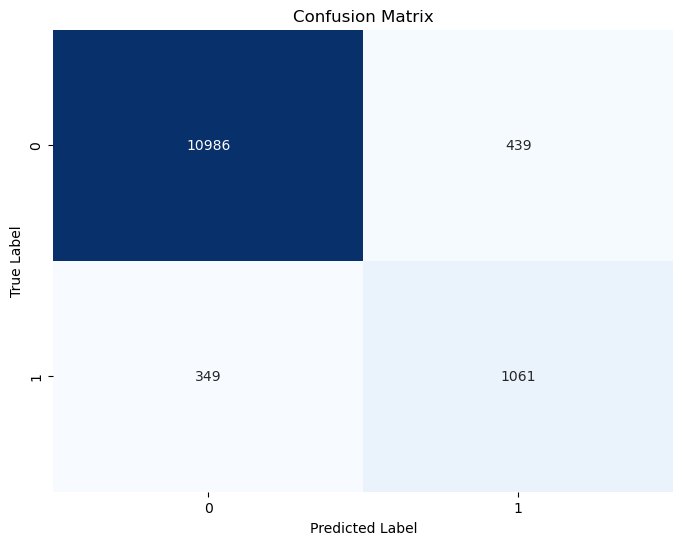

In [31]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))  # Set the figure size for the plot
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)  # Create a heatmap of the confusion matrix using Seaborn
plt.xlabel('Predicted Label')  # Set the label for the x-axis
plt.ylabel('True Label')  # Set the label for the y-axis
plt.title('Confusion Matrix')  # Set the title of the plot
plt.show()  # Display the plot

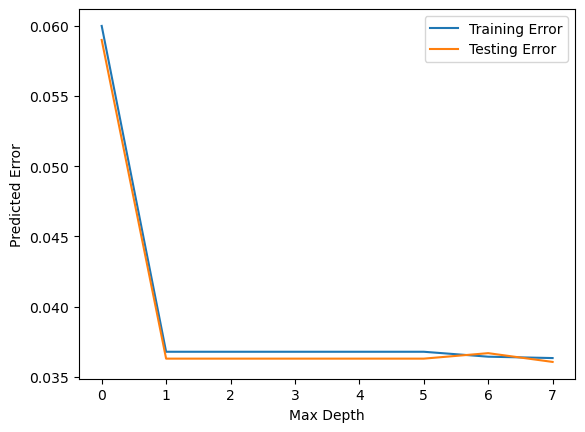

In [32]:
max_depth_list = range(1, 9)
train_errors = []
test_errors = []

for x in max_depth_list:
    dtc = DecisionTreeClassifier(max_depth=x) 
    dtc.fit(x_train, y_train)
    train_z = dtc.predict(x_train)
    test_z = dtc.predict(x_test)
    train_errors.append(1 - accuracy_score(y_train, train_z))
    test_errors.append(1 - accuracy_score(y_test, test_z))

x = np.arange(len(max_depth_list))
plt.plot(x, train_errors, label='Training Error') 
plt.plot(x, test_errors, label='Testing Error') 
plt.xlabel('Max Depth')  # Label x-axis
plt.ylabel('Predicted Error') 
plt.legend() 
plt.show()

In [33]:
roc_auc = roc_auc_score(y_test, y_pred_test_DT)
print(roc_auc)

0.8570288809224514


# Multilayer perceptron

In [34]:
from sklearn.neural_network import MLPClassifier

In [35]:
clfML = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500, random_state=42)

clfML.fit(x_train, y_train)


MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

In [37]:
y_train_pred = clfML.predict(x_train)

y_test_pred_ML = clfML.predict(x_test)

train_accuracy_ML = accuracy_score(y_train, y_train_pred)
print("\nTraining Accuracy:", train_accuracy_ML)

test_accuracy_ML = accuracy_score(y_test, y_test_pred_ML)
print("Testing Accuracy:", test_accuracy_ML)


Training Accuracy: 0.9665348578997605
Testing Accuracy: 0.9611219322165953


In [38]:
print("\nClassification Report (Testing Data):")
print(classification_report(y_test, y_test_pred_ML))


Classification Report (Testing Data):
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     11425
           1       0.93      0.70      0.80      1410

    accuracy                           0.96     12835
   macro avg       0.95      0.85      0.89     12835
weighted avg       0.96      0.96      0.96     12835



In [39]:
conf_matrix = confusion_matrix(y_test, y_test_pred_ML)
print("\nConfusion Matrix (Testing Data):")
print(conf_matrix)


Confusion Matrix (Testing Data):
[[11351    74]
 [  425   985]]


In [40]:
TN, FP, FN, TP = conf_matrix.ravel()

# Display TP, FP, TN, FN
print("\nTrue Positives:", TP)
print("False Positives:", FP)
print("True Negatives:", TN)
print("False Negatives:", FN)



True Positives: 985
False Positives: 74
True Negatives: 11351
False Negatives: 425


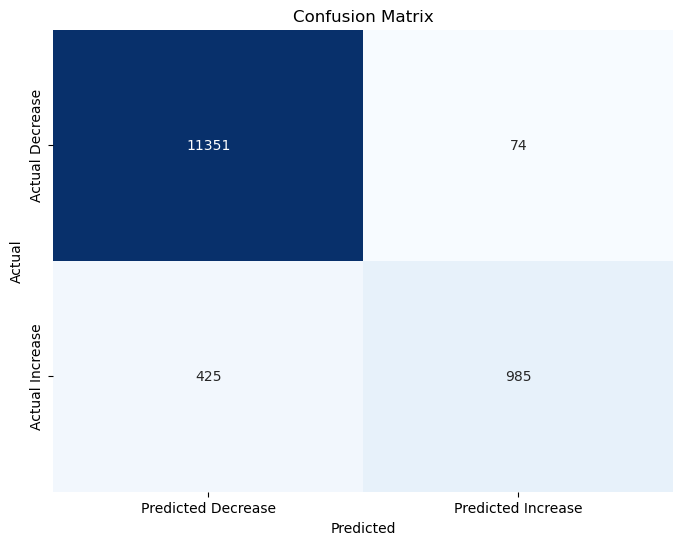

In [41]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted Decrease', 'Predicted Increase'], 
            yticklabels=['Actual Decrease', 'Actual Increase'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

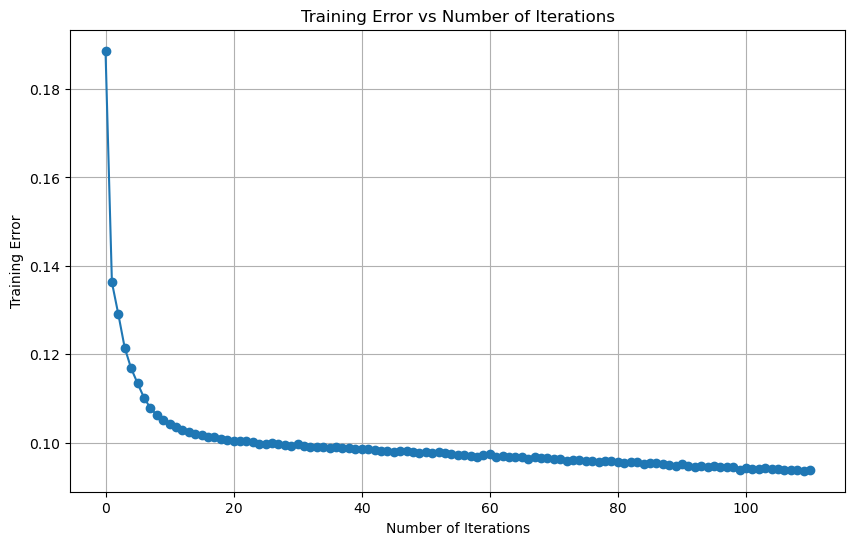

In [42]:
train_errors = clfML.loss_curve_
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(train_errors)), train_errors, marker='o', linestyle='-')
plt.title('Training Error vs Number of Iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Training Error')
plt.grid(True)
plt.show()

In [43]:
roc_auc = roc_auc_score(y_test, y_test_pred_ML)
print(roc_auc)

0.8460522681068329
